In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

# Find CSV inside the downloaded path
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
csv_path = os.path.join(path, csv_file)

# Load with pandas
df = pd.read_csv(csv_path)
print("✅ Dataset loaded successfully")
df.head()


100%|███████████████████████████████████████| 80.6k/80.6k [00:00<00:00, 197kB/s]

Extracting files...
✅ Dataset loaded successfully


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nColumn information:")
print(df.info())

print("\nDataset description:")
print(df.describe())

DATASET OVERVIEW
Dataset shape: (4269, 13)
Number of samples: 4269
Number of features: 13

First 5 rows:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   124000

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

print("Missing Values Analysis:")
print("="*40)

missing_data = df.isnull().sum()
missing_percent = (missing_data/len(df))*100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent.round(2)
})

missing_df = missing_df[missing_df['Missing Count'] > 0]
print(missing_df)

# Only plot if missing data exists
if not missing_df.empty:
    plt.figure(figsize=(10, 6))
    missing_df.plot(x='Column', y='Missing Percentage', kind='bar', color='coral')
    plt.title('Missing Data Percentage by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage Missing')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values found in the dataset!")


Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing Count, Missing Percentage]
Index: []

✅ No missing values found in the dataset!


Target Variable Analysis:
Dataset Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
No target column found. Please check dataset columns.
Numerical features: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
       loan_id   no_of_dependents   income_annum   loan_amount   loan_term  \
count   4269.0             4269.0        4269.00       4269.00     4269.00   
mean    2135.0                2.5     5059123.92   15133450.46       10.90   
std     1232.5                1.7     2806839.83    9043362.98        5.71   
min        1.0                0.0      200000.00     300000.00        2.00   
25%     1068.0                1.0     2700000.00 

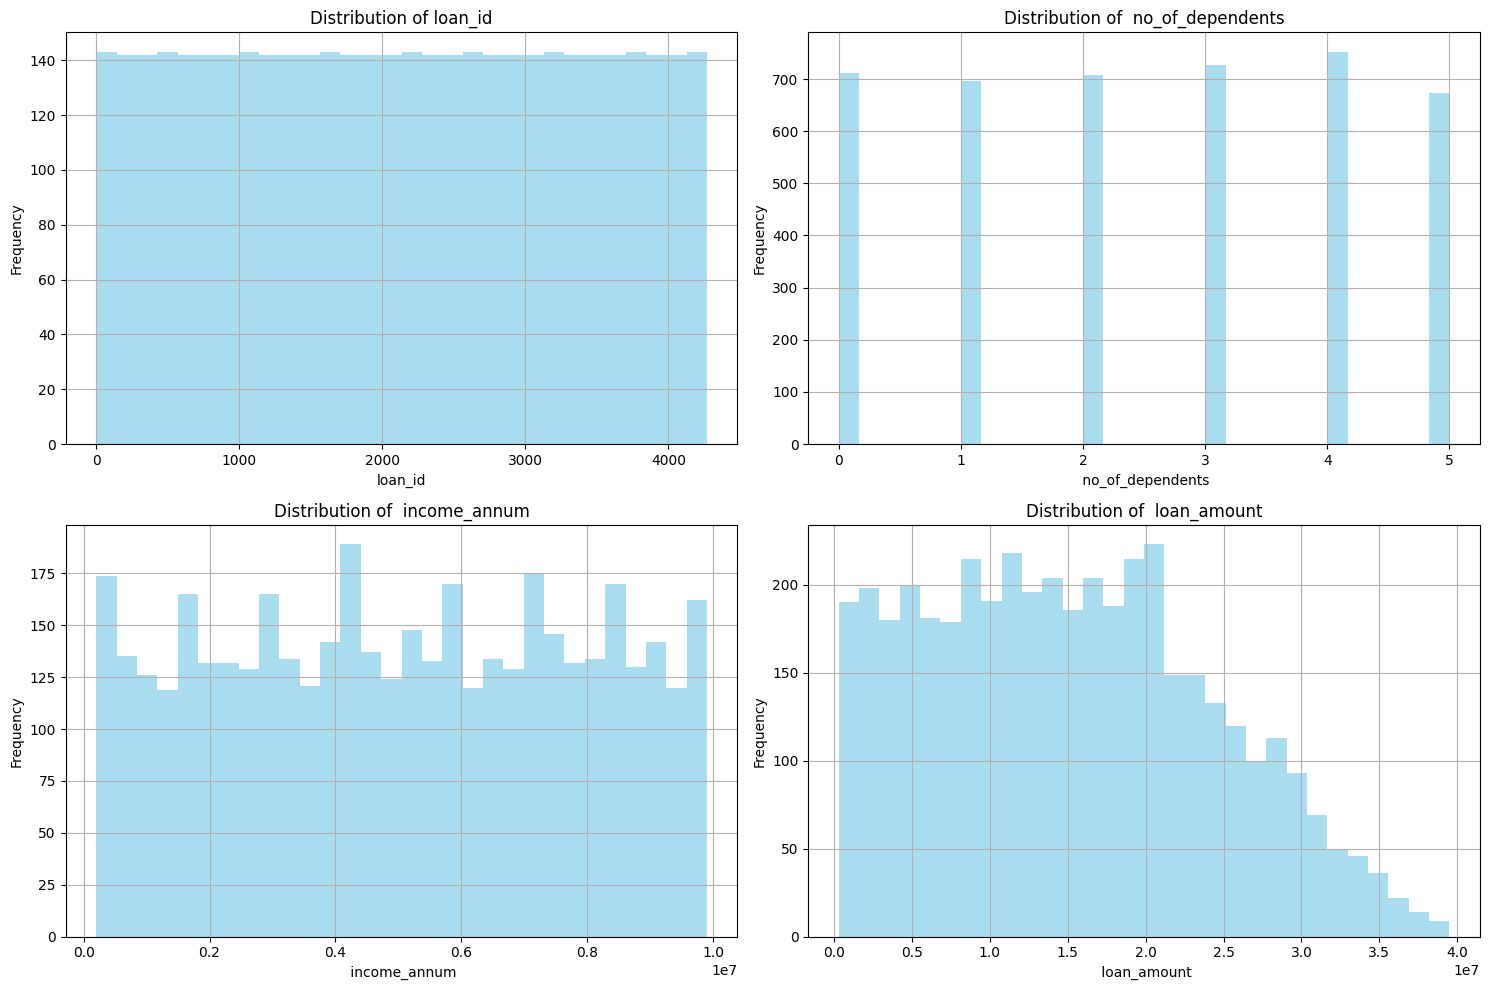

In [10]:
print("Target Variable Analysis:")
print("="*30)

print("Dataset Columns:", df.columns.tolist())

target_col = None
for col in df.columns:
    if col.lower() in ['loan_status', 'status', 'approved', 'loan_approved']:
        target_col = col
        break

if target_col:
    target_counts = df[target_col].value_counts()
    target_percent = df[target_col].value_counts(normalize=True) * 100

    print("Loan Status Distribution:")
    for status, count in target_counts.items():
        percentage = target_percent[status]
        print(f"{status}: {count} ({percentage:.1f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    target_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
    axes[0].set_title('Loan Status Distribution')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    target_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                       colors=['lightcoral', 'lightblue'])
    axes[1].set_title('Loan Status Percentage')
    axes[1].set_ylabel('')
    plt.tight_layout()
    plt.show()

    if 'Y' in target_counts.index:
        approval_rate = (target_counts['Y'] / len(df)) * 100
        print(f"\nOverall loan approval rate: {approval_rate:.1f}%")
else:
    print("No target column found. Please check dataset columns.")

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {numerical_features}")
print(df[numerical_features].describe().round(2))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for idx, feature in enumerate(numerical_features[:4]):
    if feature in df.columns:
        df[feature].hist(bins=30, ax=axes[idx], alpha=0.7, color='skyblue')
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


Categorical features: [' education', ' self_employed', ' loan_status']

 education unique values:
 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

 self_employed unique values:
 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

 loan_status unique values:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


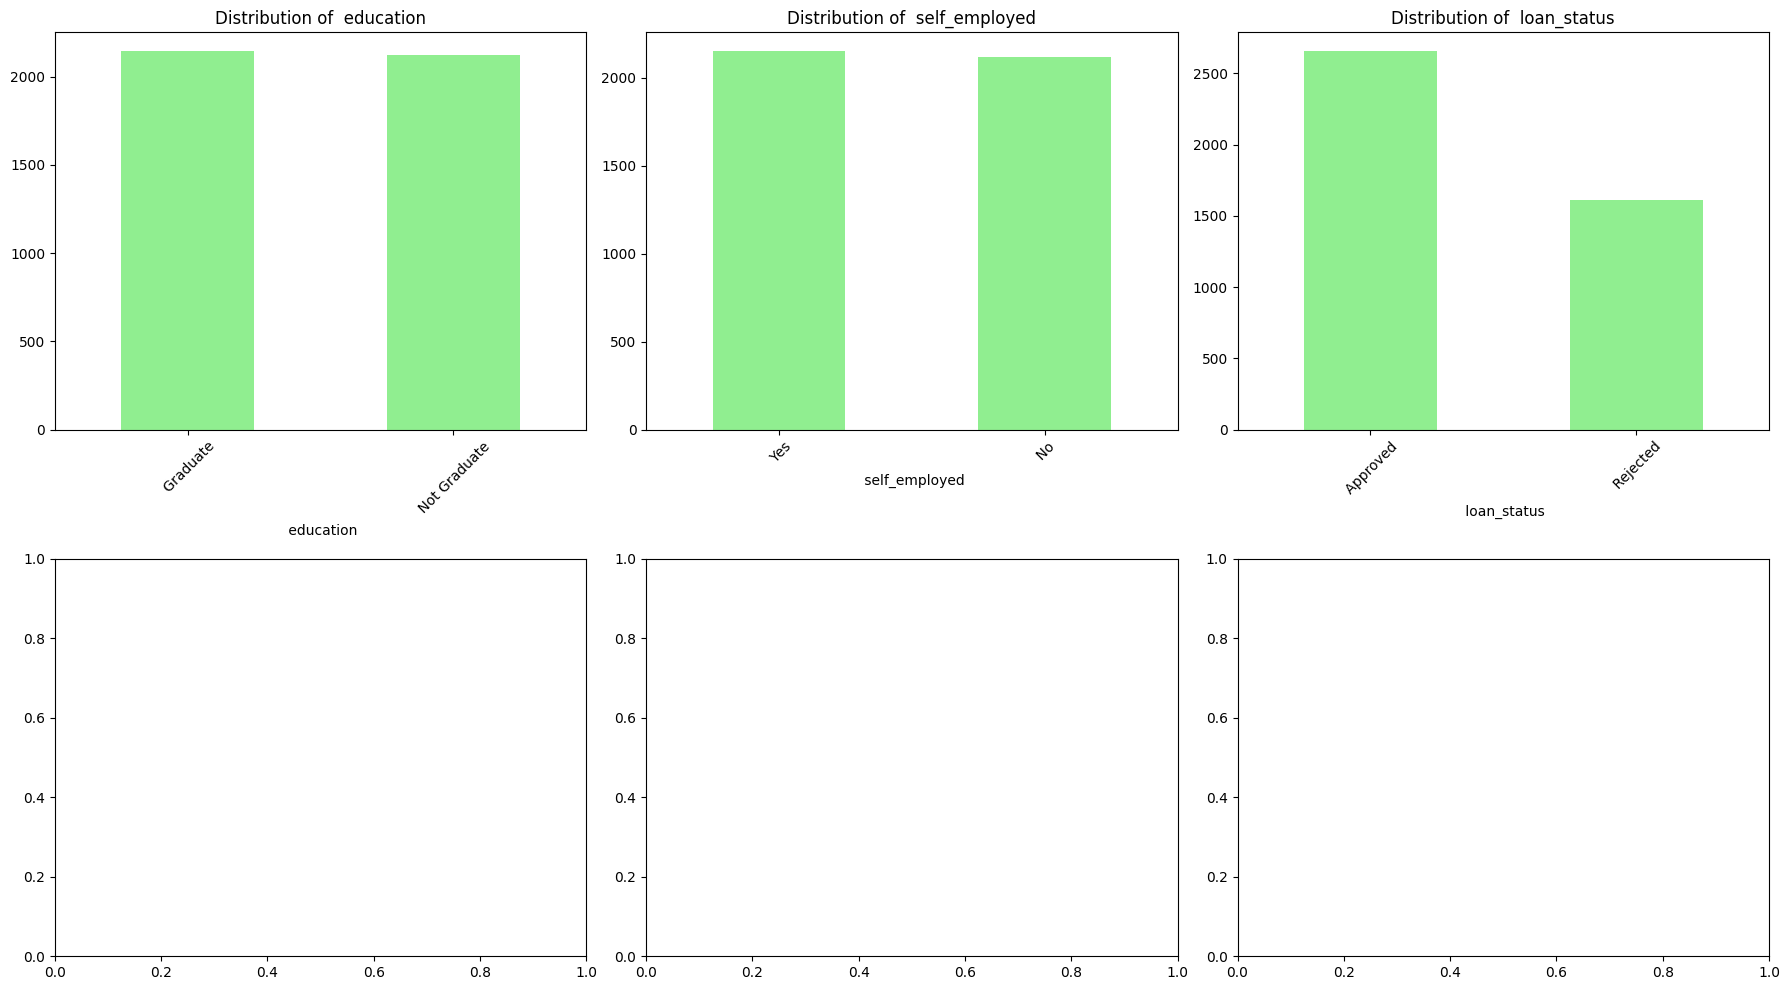

In [11]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
if 'Loan_Status' in categorical_features:
    categorical_features.remove('Loan_Status')

print(f"Categorical features: {categorical_features}")

for feature in categorical_features:
    print(f"\n{feature} unique values:")
    print(df[feature].value_counts())

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features[:6]):
    if idx < len(axes):
        df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='lightgreen')
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [18]:
# Check what columns are actually in your DataFrame
print("All columns in the dataset:")
print(df.columns.tolist())
print(f"\nTotal columns: {len(df.columns)}")

# Look for any column that might be the target variable
print("\nLooking for target-like columns:")
for col in df.columns:
    if any(word in col.lower() for word in ['status', 'target', 'label', 'class', 'approved', 'result']):
        print(f"Found potential target column: {col}")


All columns in the dataset:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

Total columns: 13

Looking for target-like columns:
Found potential target column:  loan_status


In [19]:
# Universal solution - find and use the correct target column
print("All columns in dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# You need to tell us which column number is your target variable
# Look at the output above and replace the number below with your target column index
target_col_index = -1  # CHANGE THIS: Replace -1 with the correct column number

if target_col_index == -1:
    print("❌ ERROR: Please set target_col_index to the correct column number")
    print("Look at the column list above and find your target variable")
else:
    target_col = df.columns[target_col_index]
    print(f"✅ Using target column: {target_col}")
    
    # Now the analysis will work
    for feature in categorical_features:
        print(f"\n{feature} vs {target_col}:")
        crosstab = pd.crosstab(df[feature], df[target_col])
        print(crosstab)
        
        # Calculate approval rates for the first value in target column
        first_target_value = crosstab.columns[0]
        approval_rates = pd.crosstab(df[feature], df[target_col], normalize='index')[first_target_value] * 100
        
        print(f"\nRates for '{first_target_value}':")
        for category, rate in approval_rates.items():
            print(f"  {category}: {rate:.1f}%")
        
        # Visualization
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, hue=target_col)
        plt.title(f'{feature} vs {target_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


All columns in dataset:
0: loan_id
1:  no_of_dependents
2:  education
3:  self_employed
4:  income_annum
5:  loan_amount
6:  loan_term
7:  cibil_score
8:  residential_assets_value
9:  commercial_assets_value
10:  luxury_assets_value
11:  bank_asset_value
12:  loan_status
❌ ERROR: Please set target_col_index to the correct column number
Look at the column list above and find your target variable


In [20]:
# Complete data overview
print("=== DATASET DEBUG INFO ===")
print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print(f"Data types:")
print(df.dtypes)
print(f"\nFirst few rows:")
print(df.head())



=== DATASET DEBUG INFO ===
Dataset shape: (4269, 13)
Column names: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
Data types:
loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

First few rows:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2          

In [21]:
df.columns = df.columns.str.strip()
print("Fixed column names:", df.columns.tolist())

Fixed column names: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [22]:
target_col = 'loan_status'


education vs loan_status:
loan_status   Approved  Rejected
education                       
Graduate          1339       805
Not Graduate      1317       808

Approval rates (for 'Approved'):
   Graduate: 62.5%
   Not Graduate: 62.0%


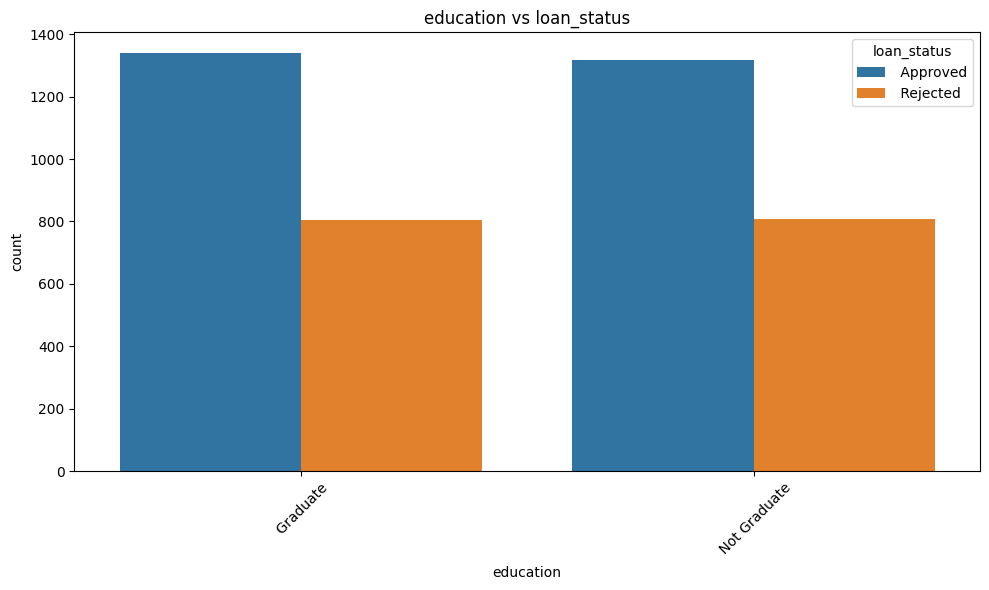


self_employed vs loan_status:
loan_status    Approved  Rejected
self_employed                    
No                 1318       801
Yes                1338       812

Approval rates (for 'Approved'):
   No: 62.2%
   Yes: 62.2%


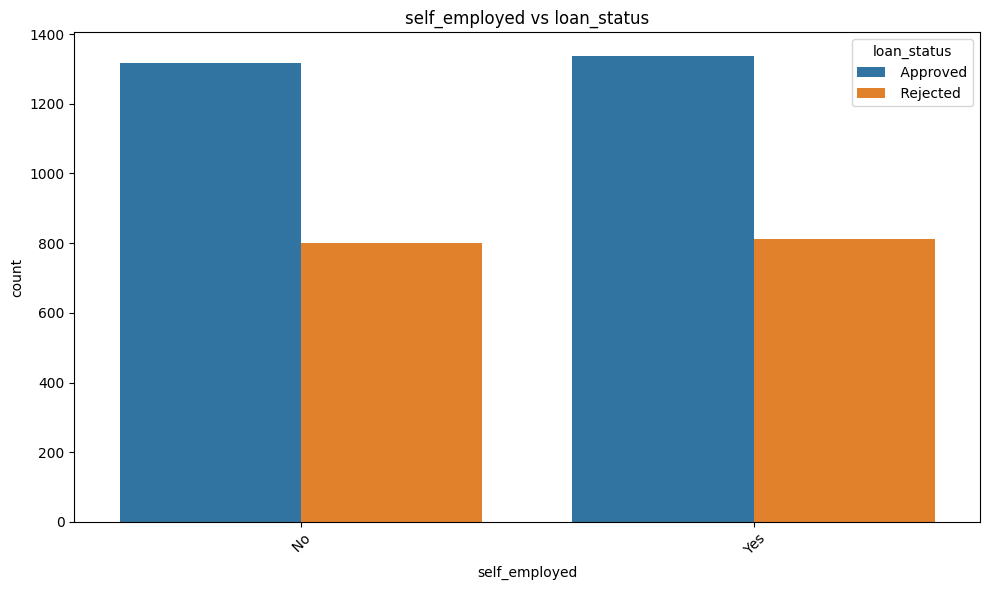

In [23]:
# Use cleaned column names and correct target variable
categorical_features = ['education', 'self_employed']  # Add more if needed

target_col = 'loan_status'

for feature in categorical_features:
    print(f"\n{feature} vs {target_col}:")
    crosstab = pd.crosstab(df[feature], df[target_col])
    print(crosstab)

    # Calculate approval rates
    if 'Approved' in crosstab.columns:
        approval_label = 'Approved'
    else:
        approval_label = crosstab.columns[0]  # fallback to first column

    approval_rates = pd.crosstab(df[feature], df[target_col], normalize='index')[approval_label] * 100
    print("\nApproval rates (for 'Approved'):")
    for category, rate in approval_rates.items():
        print(f"  {category}: {rate:.1f}%")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue=target_col)
    plt.title(f'{feature} vs {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
